# Plantillas desde SXS
Primero instalamos la libreria sxs `!pip install sxs -q`

In [ ]:
!pip install sxs -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.4/224.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.2/784.2 kB 14.7 MB/s eta 0:00:00


In [ ]:
import sxs # import sxs
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'

In [ ]:
sxs_bhns_0001 = sxs.load("SXS:BHNS:0001")
w = sxs_bhns_0001.h

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.


  0%|          | 0/5589954 [00:00<?, ?it/s]

  0%|          | 0/5870580 [00:00<?, ?it/s]

`w.metadata` los datos de los datos

In [ ]:
print('tipo de objetos: '+w.metadata.object_types)

tipo de objetos: BHNS


In [ ]:
t0 = w.metadata.reference_time # tiempo de referencia, al inicio hay "junk radiation"
print(f't0 = {t0}')

t0 = 300.0


In [ ]:
w.data # todos los multipolos

array([[-4.04899539e-02-1.15320074e-02j,  1.24083095e-02-2.76385797e-03j,
         5.96269770e-03+2.74488223e-09j, ...,
        -2.59332166e-04-1.69721256e-04j, -2.87959279e-04+3.27772666e-05j,
         5.06214626e-04+2.74773526e-04j],
       [-4.03951495e-02-1.15167674e-02j,  1.23874509e-02-2.77082959e-03j,
         5.85971704e-03+3.75190924e-09j, ...,
        -2.64983809e-04-1.70103458e-04j, -2.77762598e-04+3.69704746e-05j,
         5.12015521e-04+2.74271672e-04j],
       [-4.02988312e-02-1.15020515e-02j,  1.23665187e-02-2.77631812e-03j,
         5.75473620e-03+4.76186026e-09j, ...,
        -2.70464175e-04-1.70347278e-04j, -2.67226054e-04+4.11800575e-05j,
         5.17454847e-04+2.73555111e-04j],
       ...,
       [ 2.02284291e-04-7.72341379e-05j,  4.20278403e-06-3.15617172e-06j,
         1.46158440e-02+1.73870105e-08j, ...,
         1.72342800e-07+2.54371337e-07j,  1.82118450e-09-4.94863600e-10j,
        -4.26138316e-08+7.91953573e-08j],
       [ 2.02258791e-04-7.71922046e-05j,  4.

In [ ]:
ell, m = 2 , 2 # seleccionar el multipolo
i22 = w.index(ell, m) # seleccionar el indice del multipolo correspondiente
print(i22)
# guardar la onda 2 2 en w_2_2
w_2_2 = w[:, i22]

4


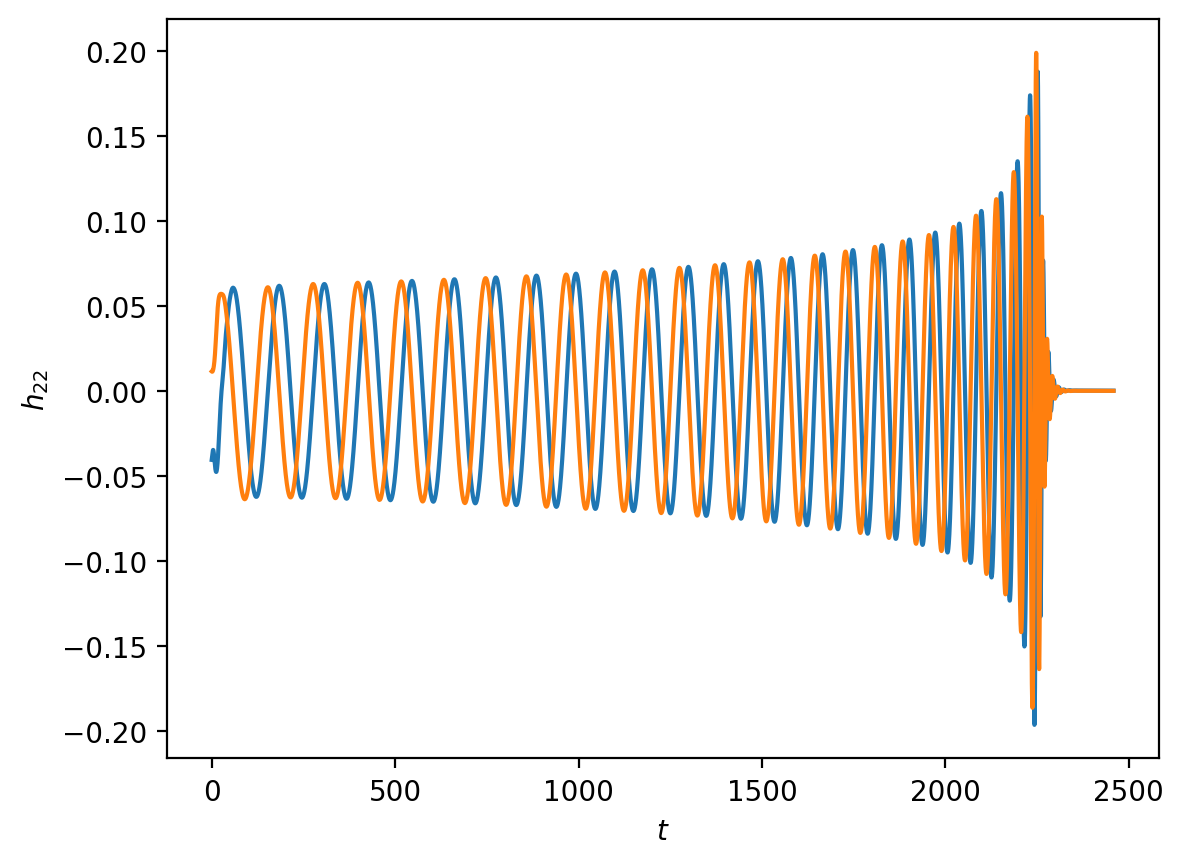

In [ ]:
plt.figure()
plt.plot(w.t, np.real(w_2_2))
plt.plot(w.t, np.imag(w_2_2))
plt.xlabel(r'$t$')
plt.ylabel(r'$h_{22}$')
plt.show()

In [ ]:
phi = np.angle(w_2_2)
fphy=np.unwrap(-phi)


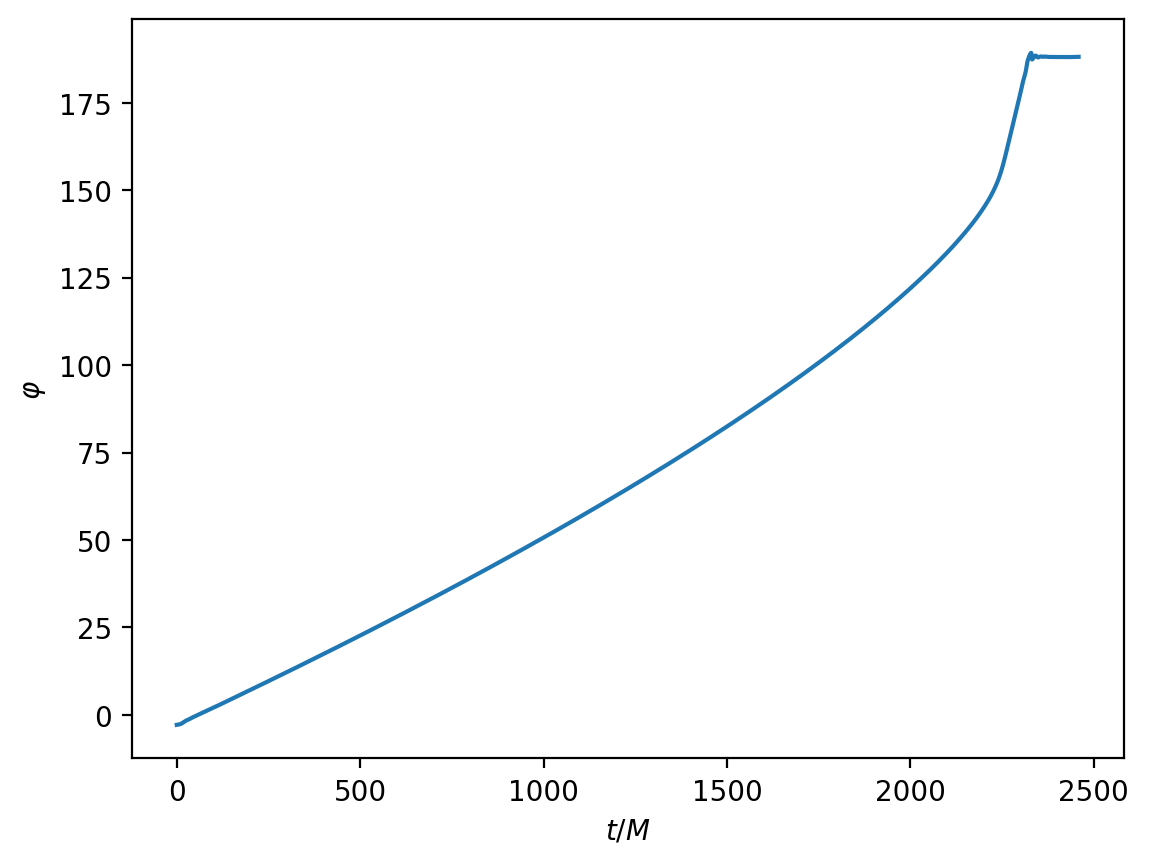

In [ ]:
plt.plot(w_2_2.t, fphy)
#plt.scatter(w_2_2.t, fphy)
plt.xlabel(r'$t/M$')
plt.ylabel(r'$\varphi$')
#plt.xlim(3500,)
#plt.ylim(200,)
plt.show()

In [ ]:
from re import T
from scipy.signal import find_peaks
w_2_2.t
fphy

#sin ruido
x_sr = w_2_2.t[300:19558:]
y_sr = fphy[300:19558:]


#Interpolación lagrange
x_new_La = w_2_2.t[300:19558:1900][:11]
y_new_La = fphy[300:19558:1900][:11]

#Interpolación
x_new = w_2_2.t[300:19558:19][: 1014]
y_new = fphy[300:19558:19][:1014]

#Comprobar el error
x_test = w_2_2.t[300:19558:38][:506]
y_test = fphy[300:19558:38][:506]

x_test1 = 0.5*(x_new[:-1] + x_new[1:])   # puntos medios
x_test1 = np.append(x_test1, x_new[-1])
y_test1 = fphy[np.searchsorted(w_2_2.t, x_test1)]  # valores de fphy en esos puntos

print("Entrenamiento:", x_new.shape)
print("Test:", x_test1.shape)
#print(x_new)
print(x_new.shape)
#print(y_new)
print(y_new.shape)
print(x_test.shape)
print(y_test.shape)
print(w_2_2.T.shape)

peaks, _ = find_peaks(fphy)

print("Índices de máximos relativos:", peaks)
print("Valores de máximos relativos:", fphy[peaks])


Entrenamiento: (1014,)
Test: (1014,)
(1014,)
(1014,)
(506,)
(506,)
(22094,)
Índices de máximos relativos: [19558 19803 20087 20284 20298 20300 20443 20532 20591 20634 20636 20639
 20728 20730 20738 20777 20781 20785 20787 20846 20848 20851 20853 20895
 20897 20925 20927 20929 20932 20943 20945 20947 20949 20951 20953 20961
 20963 20965 20967 20969 20971 20974 20976 20979 20981 20983 20985 21034
 21036 21038 21040 21067 21070 21096 21098 21100 21121 21123 21126 21128
 21137 21162 21168 21170 21176 21178 21180 21184 21187 21189 21215 21217
 21220 21222 21224 21231 21233 21236 21238 21323 21325 21328 21330 21353
 21356 21359 21362 21365 21367 21369 21378 21381 21384 21386 21388 21413
 21415 21468 21471 21473 21493 21495 21504 21507 21509 21511 21513 21527
 21530 21533 21535 21566 21569 21571 21662 21664 21667 21787 21789 21901
 21904 21906 21934 21936 22032]
Valores de máximos relativos: [189.26996757 188.48546081 188.24187406 188.21997376 188.21835456
 188.21766595 188.10983627 188.09473

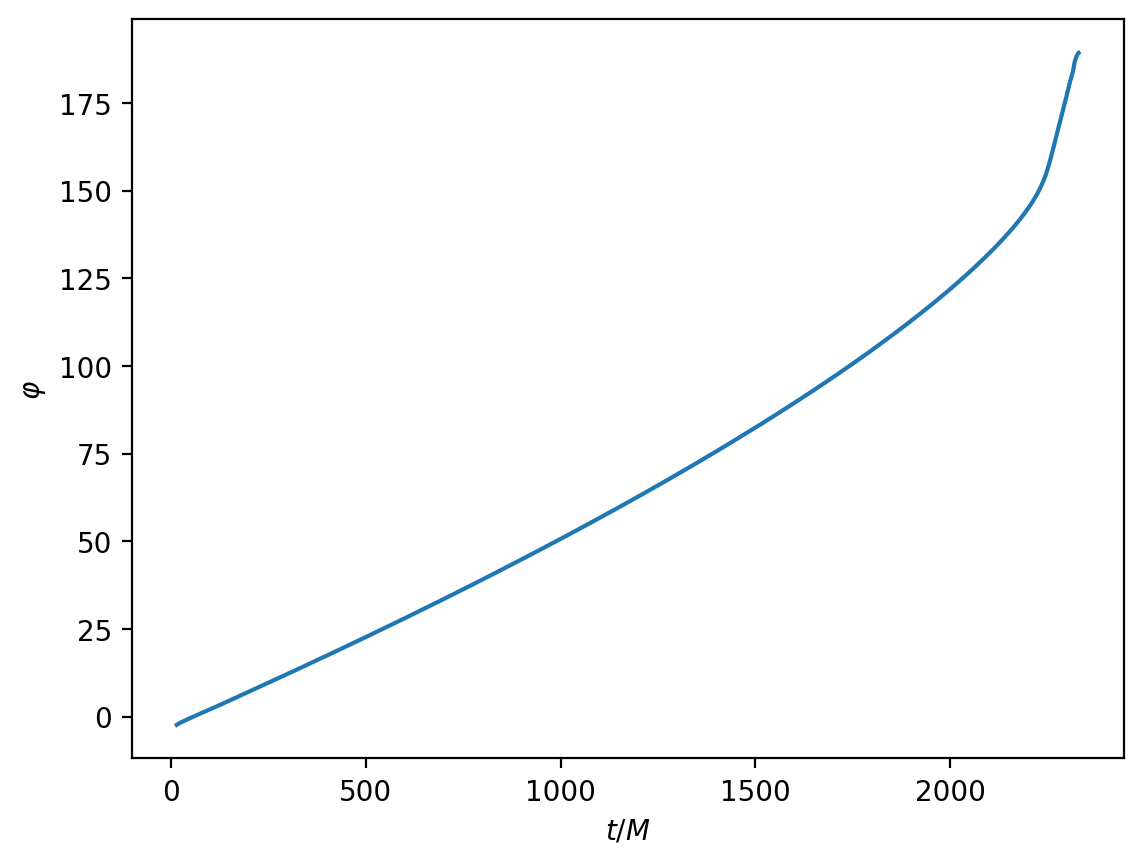

In [ ]:
plt.plot(x_sr, y_sr)
#plt.scatter(x_new_La, y_new_La)
#plt.scatter(x_new, y_new)
#plt.scatter(x_test, y_test)
plt.xlabel(r'$t/M$')
#plt.xlim(3500,)
#plt.ylim(200,)
plt.ylabel(r'$\varphi$')
plt.show()

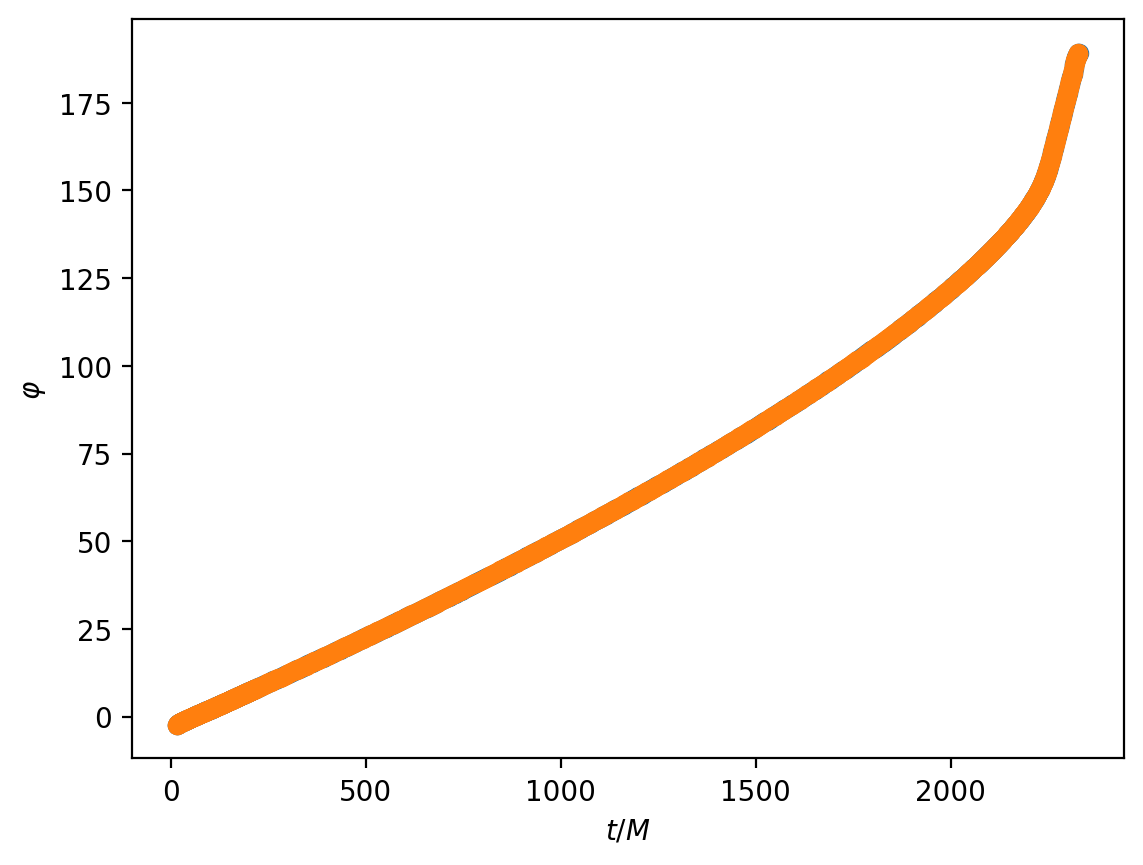

In [ ]:
#plt.plot(w_2_2.t, -phi)
plt.scatter(x_new, y_new)
plt.scatter(x_test1, y_test1)
plt.xlabel(r'$t/M$')
#plt.xlim(3500,)
#plt.ylim(200,)
plt.ylabel(r'$\varphi$')
plt.show()

In [ ]:
from scipy.interpolate import lagrange, CubicSpline, PchipInterpolator

poly_lagrange = lagrange(x_new_La, y_new_La)


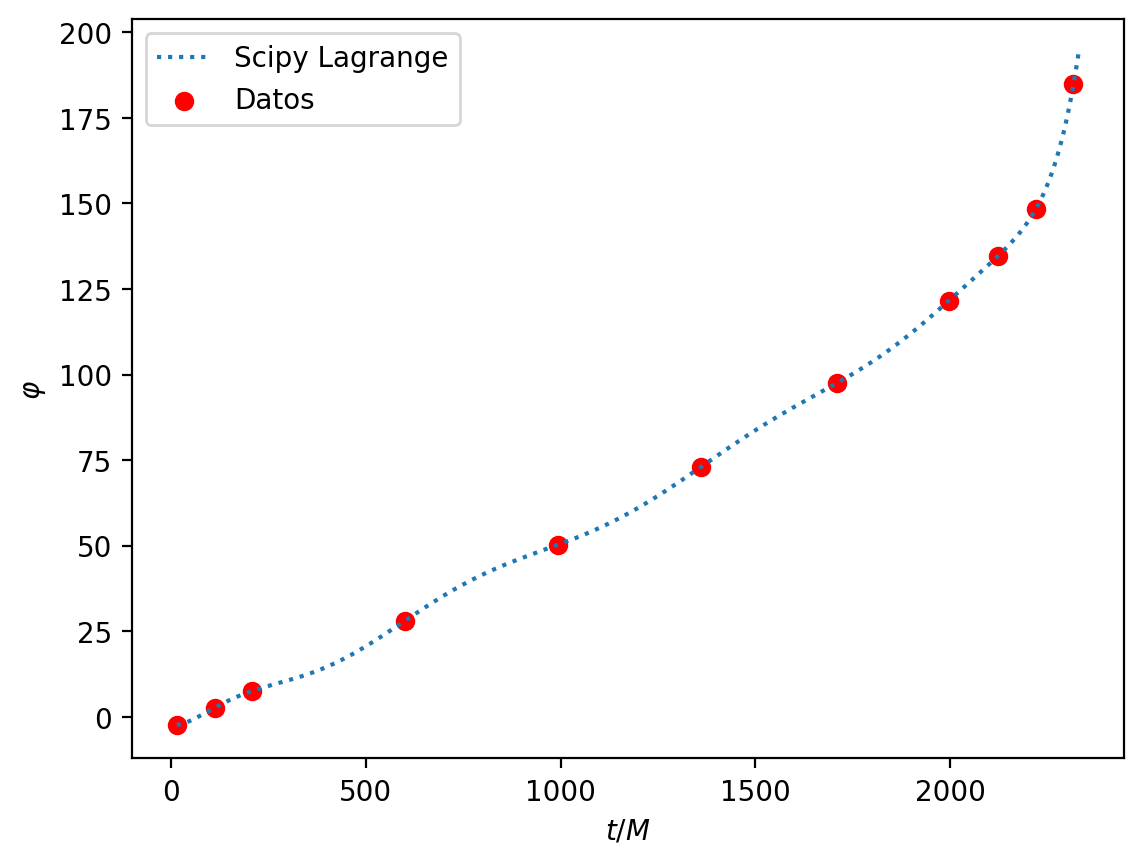

In [ ]:
plt.plot(x_sr, poly_lagrange(x_sr), ':', label='Scipy Lagrange')
plt.scatter(x_new_La, y_new_La, color='r', label='Datos')
plt.legend()
plt.xlabel(r'$t/M$')
plt.ylabel(r'$\varphi$')
plt.show()

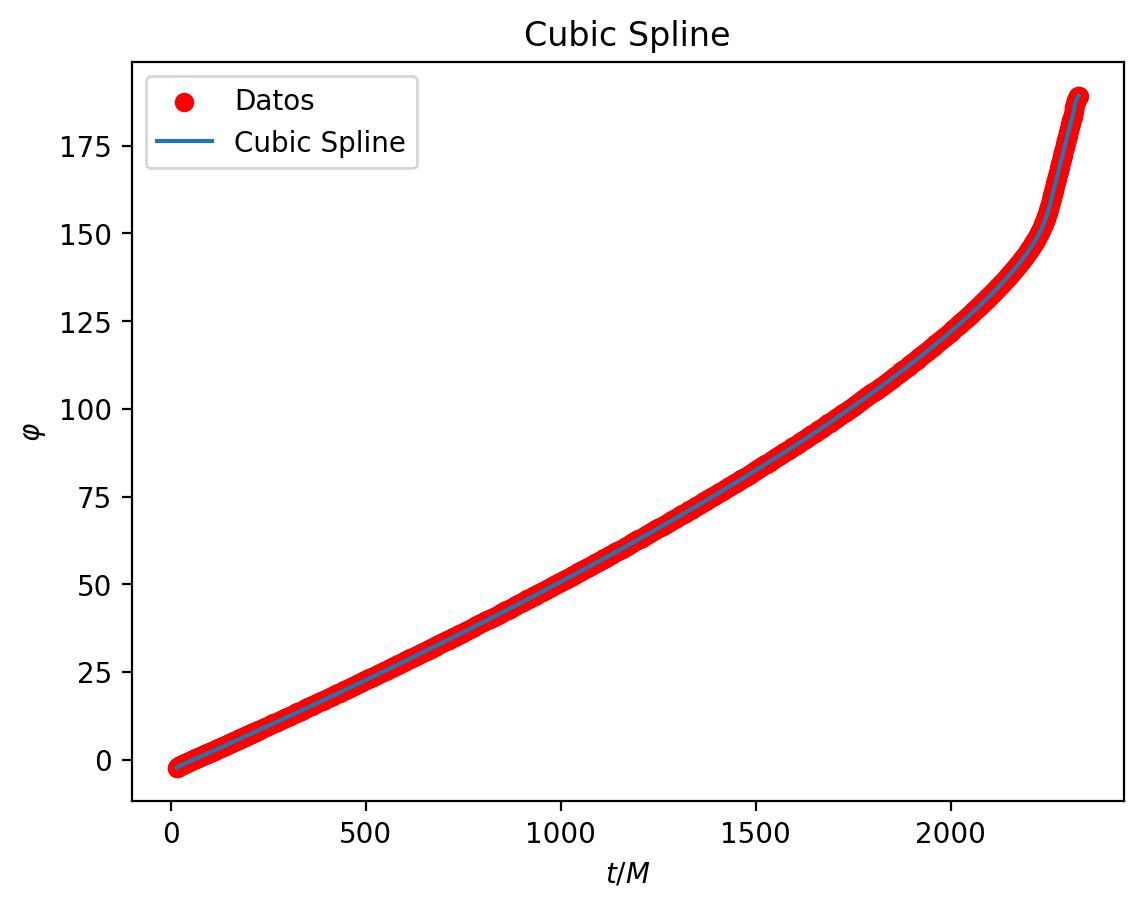

In [ ]:
spline = CubicSpline(x_new, y_new, bc_type='natural')
mag_interp_spline = spline(x_new)

plt.scatter(x_new, y_new, color='r', label='Datos')
plt.plot(x_new, mag_interp_spline, '-', label='Cubic Spline')
plt.title('Cubic Spline')
plt.xlabel(r'$t/M$')
plt.ylabel(r'$\varphi$')
plt.legend()
plt.show()

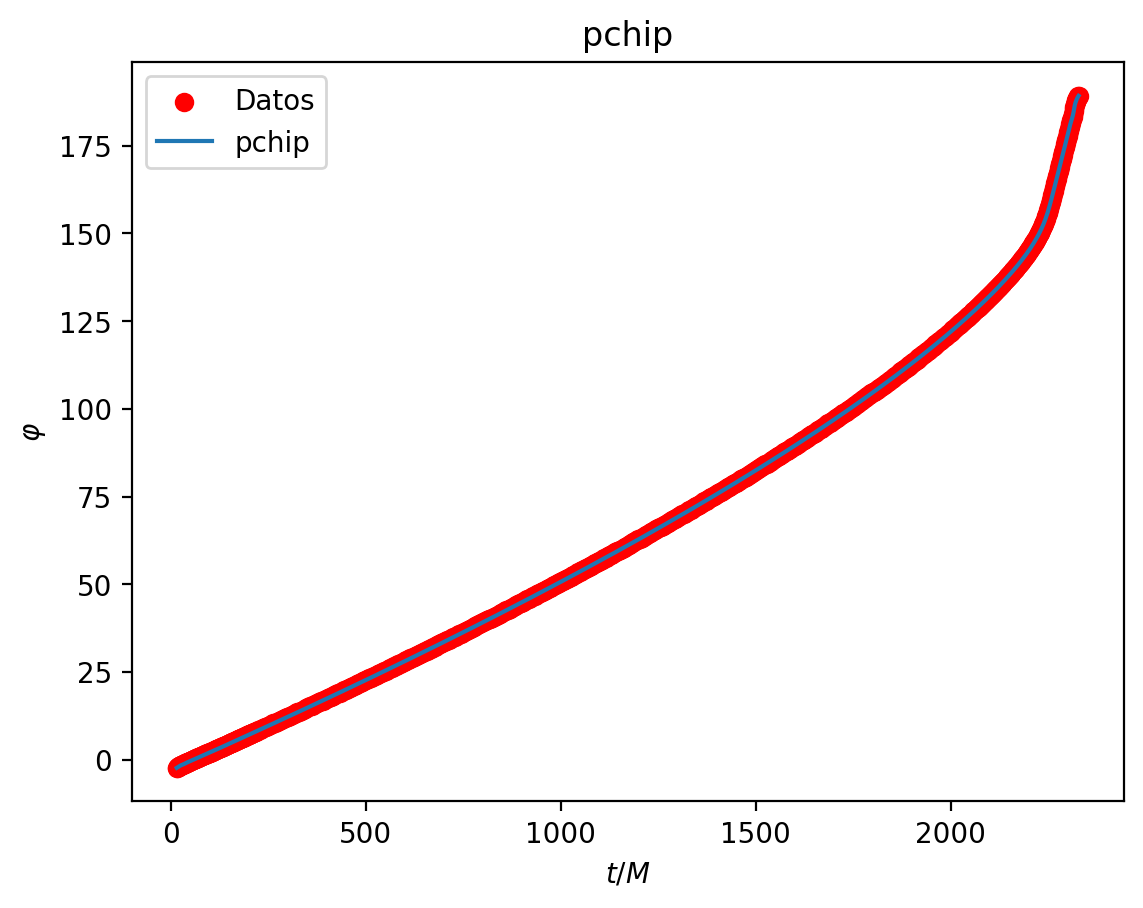

In [ ]:
pchip=PchipInterpolator(x_new, y_new)


plt.scatter(x_new, y_new, color='r', label='Datos')
plt.plot(x_new, pchip(x_new), '-', label='pchip')
plt.title('pchip')
plt.xlabel(r'$t/M$')
plt.ylabel(r'$\varphi$')
plt.legend()
plt.show()

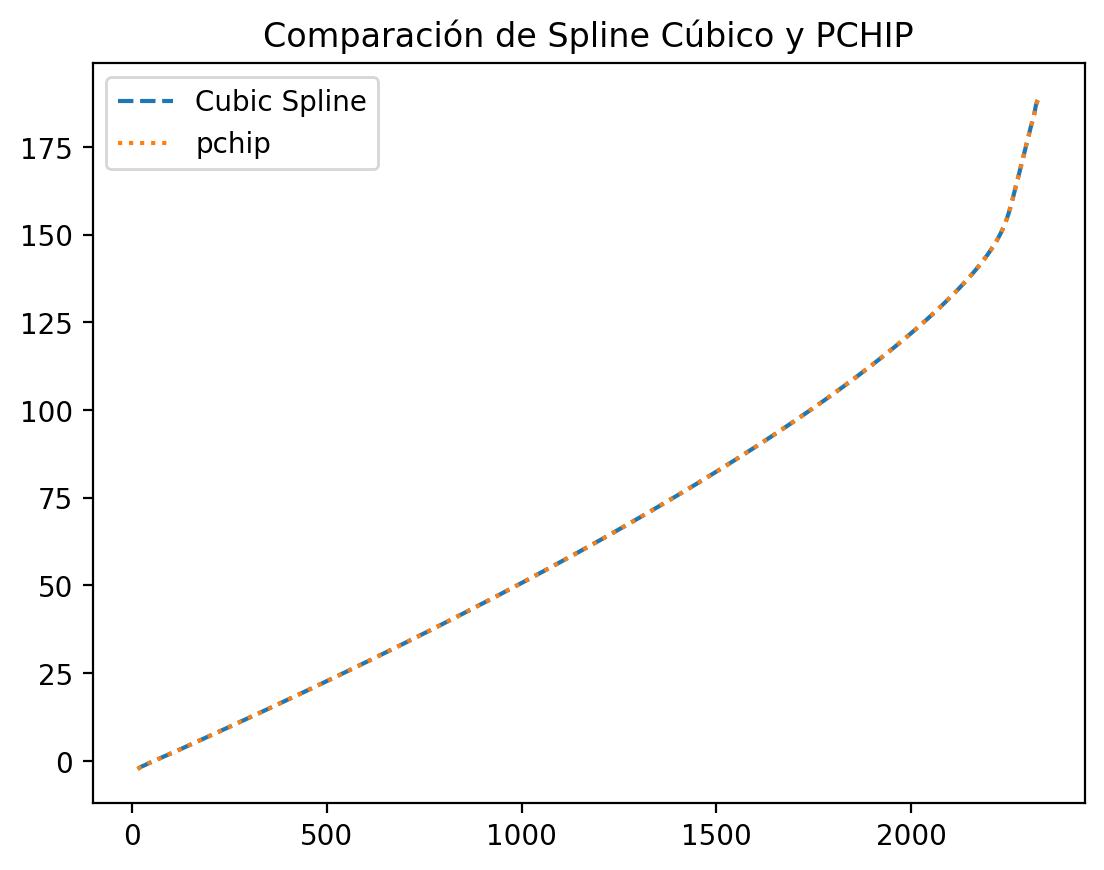

In [ ]:
  plt.plot(x_new, mag_interp_spline, '--', label='Cubic Spline')
plt.plot(x_new, pchip(x_new), ':', label='pchip')
plt.title('Comparación de Spline Cúbico y PCHIP')
plt.legend()
plt.show()

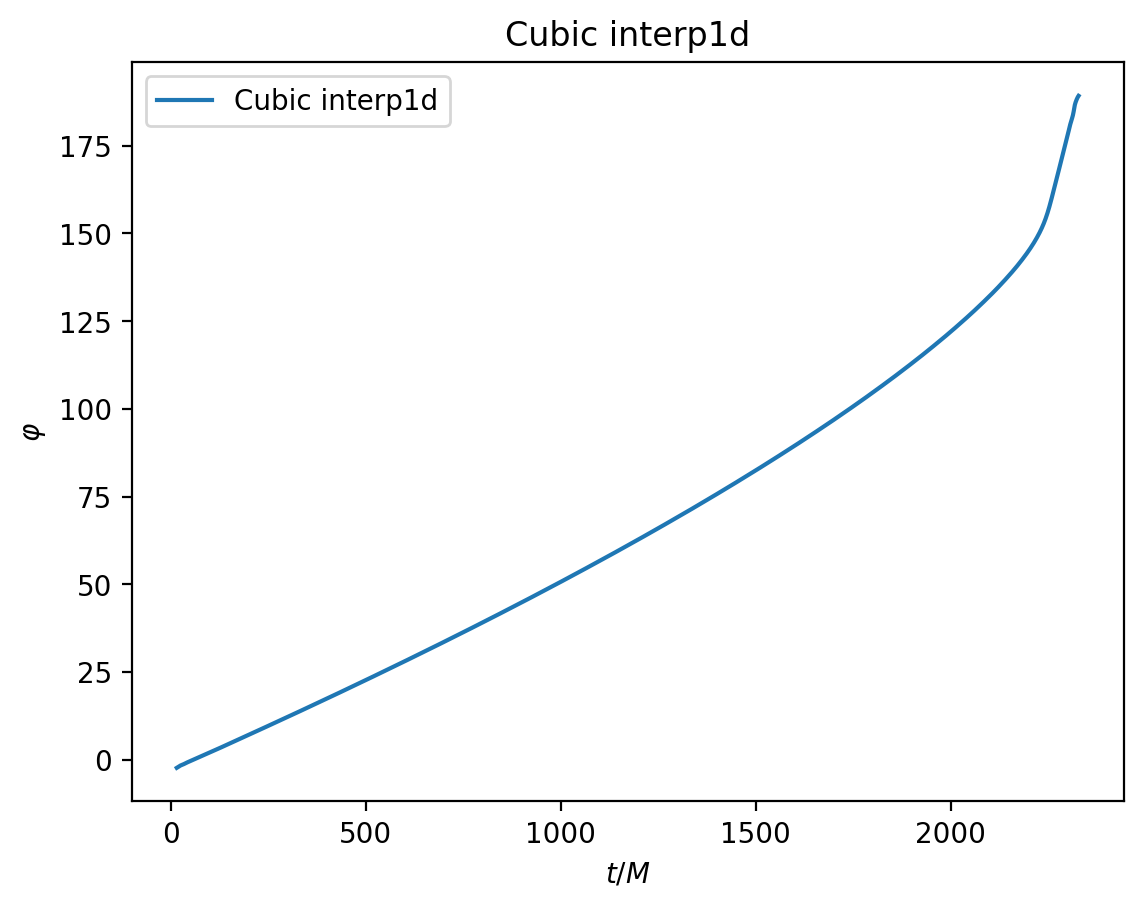

In [58]:
from scipy.interpolate import interp1d

f_cubic = interp1d(x_new, y_new, kind='cubic')
mag_interp_cubic = f_cubic(x_new)

plt.plot(x_new, mag_interp_cubic, label='Cubic interp1d')
plt.title('Cubic interp1d')
plt.xlabel(r'$t/M$')
plt.ylabel(r'$\varphi$')
plt.legend()
plt.show()

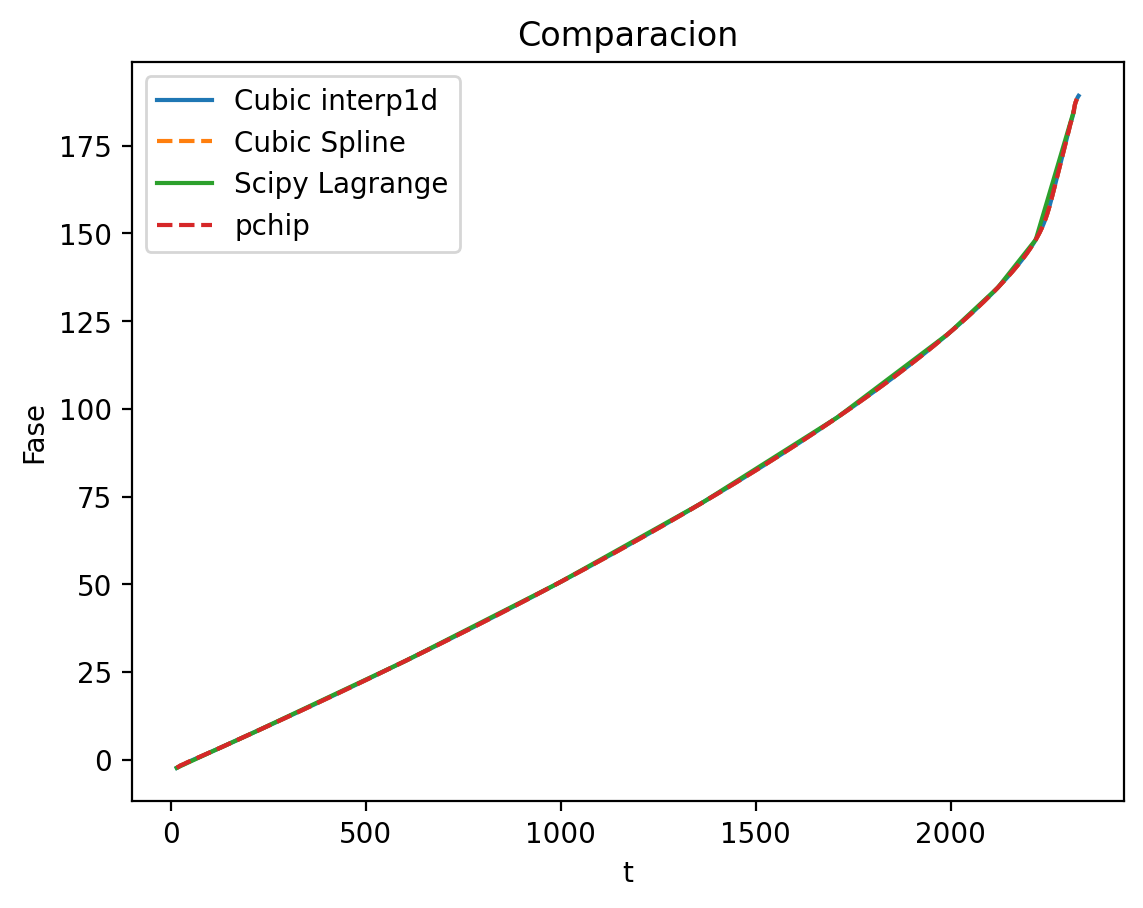

In [ ]:

#plt.scatter(x_new, y_new, color='r', label='Datos')
plt.plot(x_new, mag_interp_cubic, '-', label='Cubic interp1d')
plt.plot(x_new, mag_interp_spline, '--', label='Cubic Spline')
plt.plot(x_new_La, poly_lagrange(x_new_La), '-', label='Scipy Lagrange')
plt.plot(x_new, pchip(x_new), '--', label='pchip')
plt.xlabel(r'$t/M$')
plt.ylabel(r'$\varphi$')
#plt.xlim([1112,1113])
#plt.ylim([57.3,57.7])
plt.title('Comparacion')
plt.legend()
plt.show()

In [ ]:
#  valores de y_test
y_test_lagrange = poly_lagrange(x_test1)
y_test_spline = spline(x_test1)
y_test_cubic = f_cubic(x_test1)
y_test_pchip = pchip(x_test1)

# calcular el error cuadratico

SE_lagrange = (y_test1 - y_test_lagrange)**2
SE_CS = (y_test1 - y_test_spline)**2
SE_cubic = (y_test1 - y_test_cubic)**2
SE_pchip = (y_test1 - y_test_pchip)**2

SE1_lagrange = (y_new - y_test_lagrange)**2
SE1_CS = (y_new - y_test_spline)**2
SE1_cubic = (y_new - y_test_cubic)**2
SE1_pchip = (y_new - y_test_pchip)**2


# mean square error
MSE_lagrange = SE_lagrange.mean()
MSE_CS = SE_CS.mean()
MSE_cubic = SE_cubic.mean()
MSE_pchip = SE_pchip.mean()

print(f"MSE lagrange {MSE_lagrange:.10f}")
print(f"MSE spline {MSE_CS:.10f}")
print(f"MSE Cubic {MSE_cubic:.10f}")
print(f"MSE pchip {MSE_pchip:.10f}")

# Error absoluto
AE_lagrange = np.abs(y_test1 - y_test_lagrange)
AE_CS = np.abs(y_test1 - y_test_spline)
AE_cubic = np.abs(y_test1 - y_test_cubic)
AE_pchip = np.abs(y_test1 - y_test_pchip)

AE1_lagrange = np.abs(y_new - y_test_lagrange)
AE1_CS = np.abs(y_new - y_test_spline)
AE1_cubic = np.abs(y_new - y_test_cubic)
AE1_pchip = np.abs(y_new - y_test_pchip)


# Error absoluto medio
MAE_lagrange = AE_lagrange.mean()
MAE_CS = AE_CS.mean()
MAE_cubic = AE_cubic.mean()
MAE_pchip = AE_pchip.mean()

print(f"MAE lagrange {MAE_lagrange:.10f}")
print(f"MAE spline {MAE_CS:.10f}")
print(f"MAE Cubic {MAE_cubic:.10f}")
print(f"MAE pchip {MAE_pchip:.10f}")


MSE lagrange 1.3392989622
MSE spline 0.0000477119
MSE Cubic 0.0000476775
MSE pchip 0.0000476998
MAE lagrange 0.8168102113
MAE spline 0.0054342279
MAE Cubic 0.0054318691
MAE pchip 0.0054330088


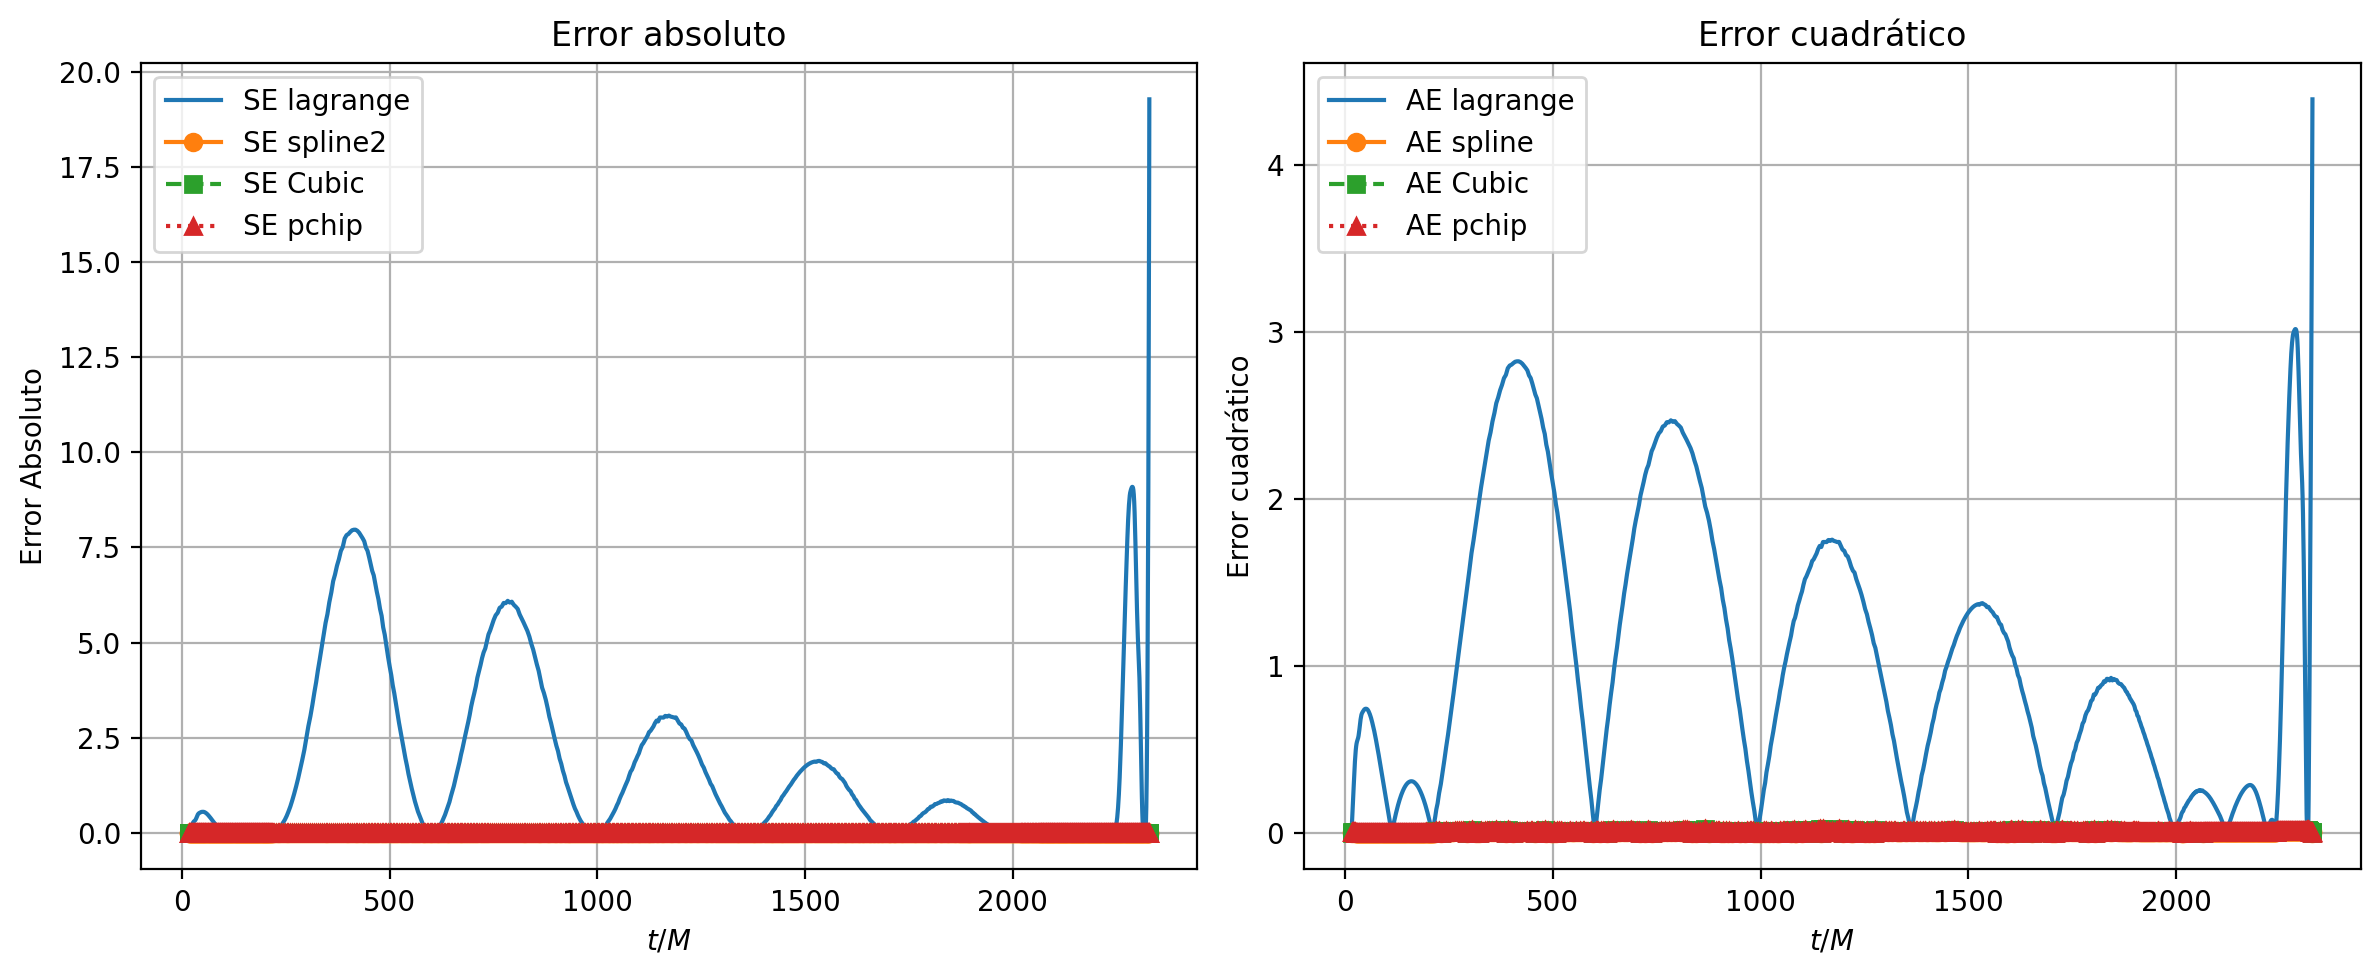

In [ ]:
plt.figure(figsize=(12,5))

# Error absoluto
plt.subplot(1,2,1)
plt.plot(x_test1, SE_lagrange, label="SE lagrange")
plt.plot(x_test1, SE_CS, label="SE spline2", linestyle= "-", marker = "o")
plt.plot(x_test1, SE_cubic, label="SE Cubic", linestyle= "--", marker = "s")
plt.plot(x_test1, SE_pchip, label="SE pchip", linestyle= ":", marker = "^")
plt.title("Error absoluto")
plt.xlabel(r'$t/M$')
plt.ylabel("Error Absoluto")
plt.legend()
plt.grid(True)

# Error cuadrático
plt.subplot(1,2,2)
plt.plot(x_test1, AE_lagrange, label="AE lagrange")

plt.plot(x_test1, AE_CS, label="AE spline", linestyle= "-", marker = "o")
plt.plot(x_test1, AE_cubic, label="AE Cubic", linestyle= "--", marker = "s")
plt.plot(x_test1, AE_pchip, label="AE pchip", linestyle= ":", marker = "^")
plt.title("Error cuadrático")
plt.xlabel(r'$t/M$')
plt.ylabel("Error cuadrático")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()